# Titanic Data Analysis

## 从性别, 年龄, Embarked, Pclass四个方面分析生还情况

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  生还情况分析

## 总生还率

In [4]:
survived_rate = titanic_df['Survived'].mean()
survived_rate

0.3838383838383838

## 按性别划分生还率

In [5]:
grouped_data_sex = titanic_df.groupby('Sex')
survived_rate_by_sex = grouped_data_sex['Survived'].mean()
survived_rate_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- 女人的生还率是74.2%, 男人的生还率是18.9%
- 女人的生化率高于男人
- 可以猜想危险发生时, 大多数男人都积极营救了女人

## 按年龄划分生还率

In [30]:
grouped_data_age = titanic_df.groupby('Age')
survived_rate_by_age = grouped_data_age['Survived'].mean()

Populating the interactive namespace from numpy and matplotlib


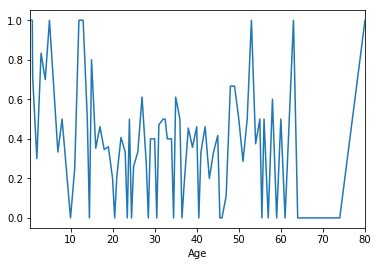

In [7]:
% pylab inline
survived_rate_by_age.plot()

- 由线性图可以看出, 由年龄划分的生还率图呈"U"字型,孩子和老人的生还率较高, 年轻人和中年人的生还率较低
- 可以猜想在危险发生时, Titanic号上的年轻人和中年人积极营救了小孩和老人

## 按登船地点(Embarked)划分生还人数

### Port of Embarkation: C

([<matplotlib.patches.Wedge at 0xa223be0>,
 [<matplotlib.text.Text at 0xa309198>, <matplotlib.text.Text at 0xa309dd8>],
 [<matplotlib.text.Text at 0xa3094e0>, <matplotlib.text.Text at 0xa316128>])

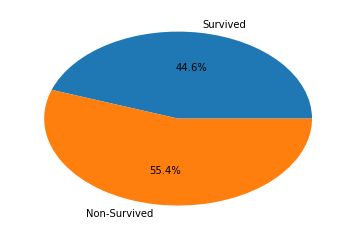

In [9]:
by_Embarked = titanic_df.groupby(['Survived','Embarked'])['Survived'].count().unstack()
plt.pie(by_Embarked['C'], labels=['Survived', 'Non-Survived'], autopct='%.1f%%')

### Port of Embarkation: Q

([<matplotlib.patches.Wedge at 0xb07b978>,
 [<matplotlib.text.Text at 0xb07bef0>, <matplotlib.text.Text at 0xb088b70>],
 [<matplotlib.text.Text at 0xb088278>, <matplotlib.text.Text at 0xb088e80>])

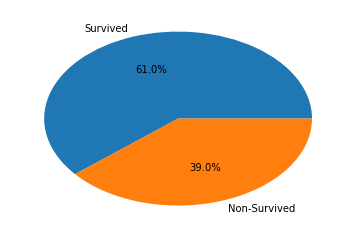

In [10]:
plt.pie(by_Embarked['Q'], labels=['Survived', 'Non-Survived'], autopct='%.1f%%')

### Port of Embarkation: S

([<matplotlib.patches.Wedge at 0xb22b978>,
 [<matplotlib.text.Text at 0xb22bef0>, <matplotlib.text.Text at 0xb239b70>],
 [<matplotlib.text.Text at 0xb239278>, <matplotlib.text.Text at 0xb239e80>])

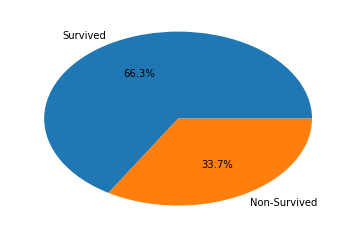

In [11]:
plt.pie(by_Embarked['S'], labels=['Survived', 'Non-Survived'], autopct='%.1f%%')

综上：
- C口上船的人死亡人数多于生还人数
- Q口和S口上船的生还人数多于死亡人数

## 按照Pclass划分生还人数

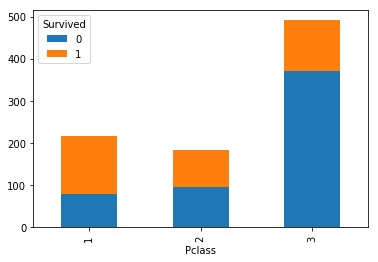

In [19]:
titanic_df.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

- 由上图可知Pclass 1的生还人数大于死亡人数; Pclass 2基本持平; Pclass 3的生还人数远小于死亡人数
- 据此可以猜想危险发生时,首先疏散撤离的是高等机舱的乘客